In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sklearn
from sklearn.preprocessing import MinMaxScaler

# Überblick

## Was ist Deep Learning?

## Arten des Deep Learning
- Suppervised Learning
- Unsupervised Learning
- Reinforcement Learning

## Die wichtigsten Frameworks
- Tensorflow (Google)
    - Keras
    - Sonnet
- Pytorch (Facebook)
- DeepLearning4J (Eclipse Foundation)
- Theano (Université de Montréal)
- MXNet (Apache)

## Grundbegriffe 
<center>
<img src="img/datenset.png" width="40%">
 </center>
### - <font color='red'>Sample</font> 
### - <font color='blue'>Features</font> 
### - <font color='green'>Label</font> 


# Das Neuron

<center><img src="img/neuron.png" width="60%"></center>

## Activation Function

In [5]:
def plot_activation(x, y, yrange=(0, 1)):
    plt.plot(x, y)
    plt.axvline(0.0, color='k')
    plt.ylim(yrange[0]-0.1, yrange[1]+0.1)
    plt.yticks(np.arange(yrange[0], yrange[1]+0.1, 0.5))
    ax = plt.gca()
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()

### Binary Step

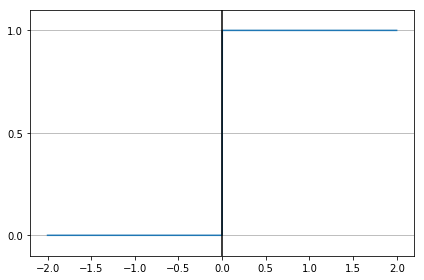

In [6]:
def threshold(x):
    return np.where(x >= 0.0, 1, 0)

x = np.arange(-2, 2, 0.001)
threshold = threshold(x)
plot_activation(x, threshold)

### Sigmoid

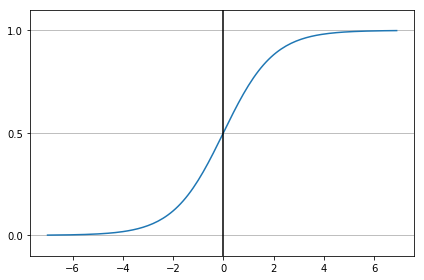

In [7]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.arange(-7, 7, 0.1)
sig = sigmoid(x)
plot_activation(x, sig)

### Tanh

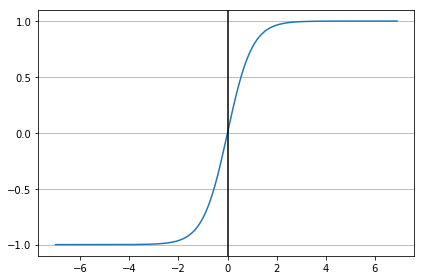

In [8]:
def tanh(x):
    return ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))

x = np.arange(-7, 7, 0.1)
tanh = tanh(x)
plot_activation(x, tanh, yrange=(-1, 1))

### Rectified linear unit

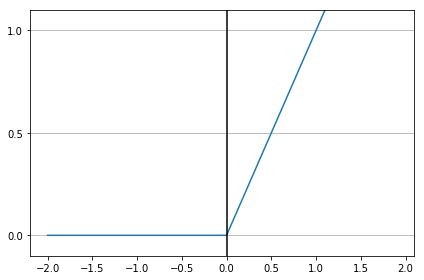

In [9]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-2, 2, 0.1)
relu = relu(x)
plot_activation(x, relu)

## Gradient Descent
<center>
<img src="img/gradient_descent.png" width="60%">
</center>

In [10]:
df = pd.read_csv("iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            print("-------------------------")
            print("Epoch: ", (i+1))
            print("Prediction on First Sample: ", output[0])
            print("-------------------------")
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return sigmoid(self.net_input(X))

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

-------------------------
Epoch:  1
Prediction on First Sample:  0.5
-------------------------
-------------------------
Epoch:  2
Prediction on First Sample:  5.418153852432133e-06
-------------------------
-------------------------
Epoch:  3
Prediction on First Sample:  0.0004107165108106998
-------------------------
-------------------------
Epoch:  4
Prediction on First Sample:  0.02727456901589131
-------------------------
-------------------------
Epoch:  5
Prediction on First Sample:  2.6354619235982345e-08
-------------------------
-------------------------
Epoch:  6
Prediction on First Sample:  1.9988435518708985e-06
-------------------------
-------------------------
Epoch:  7
Prediction on First Sample:  0.00013720821532945467
-------------------------
-------------------------
Epoch:  8
Prediction on First Sample:  7.63281271557861e-10
-------------------------
-------------------------
Epoch:  9
Prediction on First Sample:  5.787913907136857e-08
-------------------------
-

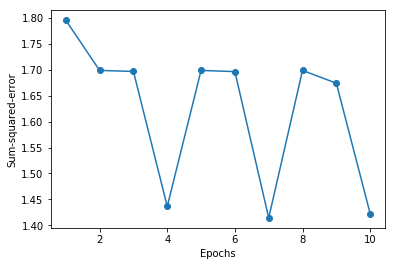

In [19]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0, 2]].values

n_iter = 10
eta = 0.01

ada = AdalineGD(n_iter=n_iter, eta=eta).fit(x, y)
plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

## Stochastic und Batch Gradient Descent
<center>
<img src="img/gradient_descent_3d.png" width="60%">
</center>

# Das Neuronale Netz

<center>
<img src="img/nn2.png" width="60%">
</center>

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.optimizers import Adam
df = pd.read_csv("iris.data", header=None)
dataset = df.values
X = dataset[:, 0:4].astype(float)
y = dataset[:,4]


/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
dummy_y = np_utils.to_categorical(encoded_y)
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, dummy_y, test_size=0.2, random_state=0)

In [21]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=[X_test, Y_test])

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 0s 4ms/step - loss: 0.9054 - acc: 0.6000 - val_loss: 0.7237 - val_acc: 0.6667
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.5391 - acc: 0.8083 - val_loss: 0.5090 - val_acc: 0.7333
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3726 - acc: 0.8500 - val_loss: 0.4068 - val_acc: 0.7667
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.2857 - acc: 0.9167 - val_loss: 0.3010 - val_acc: 0.9000
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.2298 - acc: 0.9167 - val_loss: 0.2311 - val_acc: 0.9667
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1940 - acc: 0.9333 - val_loss: 0.1930 - val_acc: 0.9667
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1628 - acc: 0.9250 - val_loss: 0.1497 - val_acc: 0.9667
Epoch 8/50
120/120 [===========

# Wichtige Arten von Neuronalen Netzen
- Densenet
- CNN
- RNN
    - LSTM
    - GRU
- Autoencoder

# Resourcen

## Video Kurse:
- [The Morpheus Tutorials - Pytorch - Youtube (deutsch)](https://www.youtube.com/watch?v=pylvlMuRKY0&list=PLNmsVeXQZj7rx55Mai21reZtd_8m-qe27)
- [The Morpheus Tutorials - Machine Learning - Youtube (deutsch)](https://www.youtube.com/watch?v=GdsOLrqj42I&list=PLNmsVeXQZj7qoIUw0MBYQ9qJffZAVdRWC)
- [Deep Learning for Coders - fast.ai](http://course.fast.ai/)
- [Machine Learning Kurs der Stanford University](https://www.coursera.org/learn/machine-learning)
- [Deep Learning Kursreihe von deeplearning.ai](https://www.coursera.org/specializations/deep-learning)
- [Deep Learning A-Z - Udemy (kostenpflichtig)](https://www.udemy.com/deeplearning/learn/v4/overview)
- [Neural Networks for Machine Learning - Kurs der University of Toronto](https://www.coursera.org/learn/neural-networks)

## Blogs:
- [Machinelearningmastery](https://machinelearningmastery.com/)
- [Fastml](fastml.com)

## Bücher:
- [Fundamentals of Deep Learning](http://www.worldcat.org/title/fundamentals-of-deep-learning-designing-next-generation-machine-intelligence-algorithms/oclc/999617443)
- [Deep Learning](http://www.worldcat.org/title/deep-learning/oclc/1015864549&referer=brief_results)
- [Python Deep Learning](http://www.worldcat.org/title/python-deep-learning/oclc/1021119477?referer=di&ht=edition)
- [Deep Learning with Keras](http://www.worldcat.org/title/deep-learning-with-keras/oclc/986102549&referer=brief_results)
- [Python Machine Learning](http://www.worldcat.org/title/python-machine-learning-unlock-deeper-insights-into-machine-learning-with-this-vital-guide-to-cutting-edge-predictive-analytics/oclc/922532674&referer=brief_results)
- [Deep Learning (Bibel)](http://www.worldcat.org/title/deep-learning/oclc/985397543&referer=brief_results)
- [Sammlung kostenloser Deep Learning Bücher](https://github.com/TechBookHunter/Free-Deep-Learning-Books)

## Platformen:
- [Kaggle - Machine Learning Competitions](https://www.kaggle.com/)
- [UCI - Machine Learning Repositroy](http://archive.ics.uci.edu/ml/index.php)